<a href="https://colab.research.google.com/github/sp2005-im/Machine-Learning-Basics-Regression-And-Classification/blob/main/Function_Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Sri Rama Jayam
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
def generate_data(num_points, noise = 0.5):
  x_values = np.sort(np.random.uniform(0, 2*np.pi, num_points))
  y_values = np.cos(x_values) + np.random.normal(0, noise, num_points)
  return x_values, y_values

num_points = 1000

x_train, y_train = generate_data(num_points, noise = 0.1)

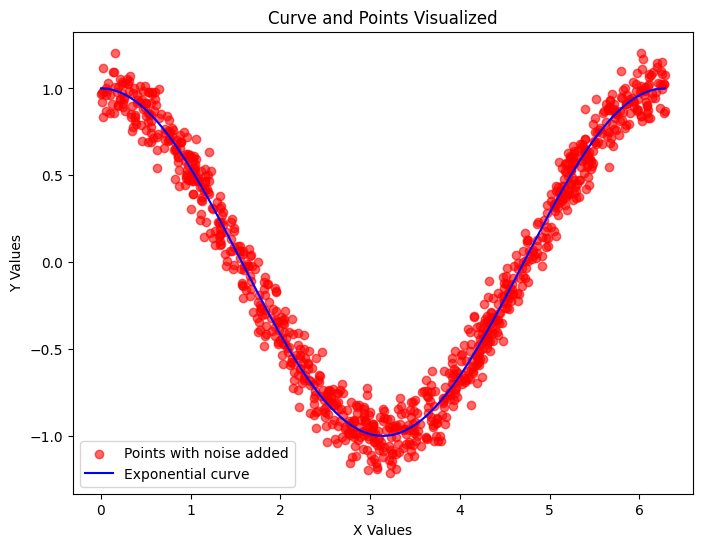

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(x_train, y_train, label = 'Points with noise added', color = 'red', alpha = 0.6)
plt.plot(x_train, np.cos(x_train), label = 'Exponential curve', color = 'blue')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Curve and Points Visualized')
plt.legend()
plt.show()

In [ ]:
class FeedForwardNN(nn.Module):
  def __init__(self):
    super(FeedForwardNN, self).__init__()
    self.fc1 = nn.Linear(1,20) # 1 input 20 hidden units
    self.activation = nn.SiLU()
    self.fc2 = nn.Linear(20,1) # 20 hidden units, 1 output

  def forward(self, x):
    x = self.fc1(x)
    x = self.activation(x)
    x = self.fc2(x)
    return x




In [ ]:
def get_optimizer(optimizer_name, model):
  if optimizer_name == "ADAM":
    return optim.Adam(model.parameters())
  elif optimizer_name == "LBFGS":
    return optim.LBFGS(model.parameters())
  raise ValueError('Chosen Optimizer is unavailable')

In [ ]:
def train(model, optimizer, criterion, inputs, targets):
  def closure():
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    return loss

  optimizer.step(closure)
  return closure().item()

def evaluate(model, x_test):
  model.eval()
  with torch.no_grad():
    y_pred = model(x_test.view(-1,1)).numpy()
  return y_pred




In [ ]:
model = FeedForwardNN()
criterion = nn.MSELoss()
optimizer = get_optimizer('ADAM', model)

num_epochs = 10000
for epoch in range(num_epochs):
  inputs = torch.tensor(x_train, dtype = torch.float32, requires_grad = True).view(-1,1)
  targets = torch.tensor(y_train, dtype = torch.float32).view(-1,1)
  loss = train(model, optimizer, criterion, inputs, targets)
  if (epoch+1) % 100 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

Epoch [100/10000], Loss: 0.5082
Epoch [200/10000], Loss: 0.3772
Epoch [300/10000], Loss: 0.2666
Epoch [400/10000], Loss: 0.1787
Epoch [500/10000], Loss: 0.1224
Epoch [600/10000], Loss: 0.0914
Epoch [700/10000], Loss: 0.0739
Epoch [800/10000], Loss: 0.0632
Epoch [900/10000], Loss: 0.0560
Epoch [1000/10000], Loss: 0.0510
Epoch [1100/10000], Loss: 0.0474
Epoch [1200/10000], Loss: 0.0447
Epoch [1300/10000], Loss: 0.0428
Epoch [1400/10000], Loss: 0.0413
Epoch [1500/10000], Loss: 0.0402
Epoch [1600/10000], Loss: 0.0392
Epoch [1700/10000], Loss: 0.0385
Epoch [1800/10000], Loss: 0.0377
Epoch [1900/10000], Loss: 0.0371
Epoch [2000/10000], Loss: 0.0364
Epoch [2100/10000], Loss: 0.0358
Epoch [2200/10000], Loss: 0.0351
Epoch [2300/10000], Loss: 0.0344
Epoch [2400/10000], Loss: 0.0336
Epoch [2500/10000], Loss: 0.0328
Epoch [2600/10000], Loss: 0.0319
Epoch [2700/10000], Loss: 0.0308
Epoch [2800/10000], Loss: 0.0298
Epoch [2900/10000], Loss: 0.0287
Epoch [3000/10000], Loss: 0.0275
Epoch [3100/10000],

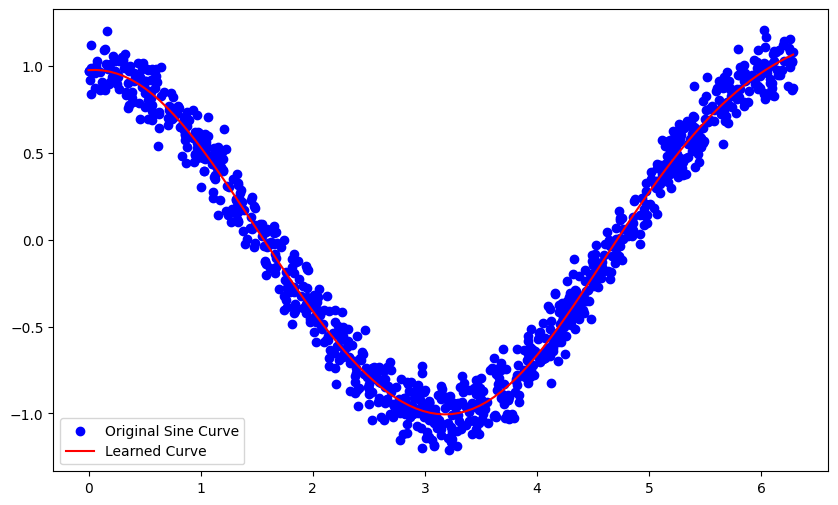

In [ ]:
x_test = torch.linspace(0, 2*np.pi, 100)
y_pred = evaluate(model, x_test)

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Original Sine Curve', color='blue')
plt.plot(x_test, y_pred, label='Learned Curve', color='red')

plt.legend()
plt.show()
